<div style="width: 100%; clear: both;">
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M0.536 - Optimización Metaheurística</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática / MU Ingeniería Computacional y Matemática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

La función auxiliar `plot_values()` utiliza las librerías matplotlib y Seaborn para graficar los datos obtenidos de `max_fitness_values` y `mean_fitness_value` de los algoritmos tratados.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_values(max_fitness_values, mean_fitness_values):
    sns.set_style("whitegrid")
    plt.plot(max_fitness_values, color="blue")
    plt.plot(mean_fitness_values, color="green")
    plt.xlabel("Generation")
    plt.ylabel("Max/Average Fitness")
    plt.title("Max and Average Fitness over Generations")
    plt.show()

# _One Max Problem_

El problema One Max es un problema de optimización cuyo objetivo es encontrar la cadena binaria de cierta longitud que tenga la mayor cantidad de unos.

In [2]:
import random

from deap import base, creator, tools


ONE_MAX_LENGTH = 100
POPULATION_SIZE = 200
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATION = 50

RANDOM_SEED = 42

random.seed(RANDOM_SEED)

toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register(
    "individualCreator",
    tools.initRepeat,
    creator.Individual,
    toolbox.zeroOrOne,
    ONE_MAX_LENGTH,
)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


def oneMaxFitness(individual):
    return (sum(individual),)


toolbox.register("evaluate", oneMaxFitness)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)

toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / ONE_MAX_LENGTH)



population = toolbox.populationCreator(n=POPULATION_SIZE)
generation_counter = 0

fitness_values = list(map(toolbox.evaluate, population))
for individual, fitness_values in zip(population, fitness_values):
    individual.fitness.values = fitness_values

fitness_values = [individual.fitness.values[0] for individual in population]

max_fitness_values, mean_fitness_values = [], []
generations = {
    "Max Fitness": max_fitness_values, 
    "Avg. Fitness": mean_fitness_values, 
    "Best Individual": []
}

while max(fitness_values) < ONE_MAX_LENGTH and generation_counter < MAX_GENERATION:
    generation_counter += 1
    offspring = toolbox.select(population, len(population))
    for c1, c2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            toolbox.mate(c1, c2)
            del c1.fitness.values
            del c2.fitness.values

    for individual in offspring:
        if random.random() < P_MUTATION:
            toolbox.mutate(individual)
            del individual.fitness.values

    fresh_individuals = [
        individual for individual in offspring if not individual.fitness.valid
    ]
    fresh_fitness_values = list(map(toolbox.evaluate, fresh_individuals))
    for individual, fitness_value in zip(fresh_individuals, fresh_fitness_values):
        individual.fitness.values = fitness_value

    population[:] = offspring
    fitness_values = [individual.fitness.values[0] for individual in population]

    max_fitness = max(fitness_values)
    mean_fitness = sum(fitness_values) / len(population)
    max_fitness_values.append(max_fitness)
    mean_fitness_values.append(mean_fitness)

    best_index = fitness_values.index(max(fitness_values))
    generations["Best Individual"].append(population[best_index])

In [3]:
import pandas as pd


# fit Best Individual list
pd.set_option('display.max_colwidth', None)

df = pd.DataFrame(generations)
df.index.name = "Gen."

|   Gen. |   Max Fitness |   Avg. Fitness | Best Individual                                                                                                                                                                                                                                                                                              |
|-------------:|--------------:|---------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|            0 |            62 |         53.23  | [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0] |
|            1 |            65 |         55.98  | [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1] |
|            2 |            66 |         58.2   | [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1] |
|            3 |            70 |         59.165 | [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1] |
|            4 |            69 |         61.695 | [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1] |
|            5 |            69 |         62.105 | [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] |
|            6 |            73 |         58.68  | [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0] |
|            7 |            67 |         61.395 | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|            8 |            69 |         63.955 | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|            9 |            72 |         63.685 | [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] |
|           10 |            71 |         61.57  | [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0] |
|           11 |            66 |         60.675 | [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] |
|           12 |            63 |         60.96  | [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0] |
|           13 |            66 |         62.875 | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           14 |            65 |         58.475 | [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0] |
|           15 |            60 |         58.05  | [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0] |
|           16 |            58 |         54.675 | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           17 |            61 |         59     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           18 |            57 |         56.965 | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           19 |            53 |         53     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           20 |            53 |         53     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           21 |            56 |         56     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           22 |            45 |         45     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           23 |            49 |         49     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           24 |            46 |         46     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           25 |            46 |         46     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           26 |            43 |         43     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           27 |            45 |         45     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           28 |            46 |         46     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           29 |            51 |         51     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           30 |            47 |         47     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           31 |            45 |         45     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           32 |            41 |         41     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           33 |            46 |         46     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           34 |            45 |         45     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           35 |            43 |         43     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           36 |            48 |         48     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           37 |            46 |         46     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           38 |            44 |         44     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           39 |            43 |         43     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           40 |            42 |         42     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           41 |            43 |         43     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           42 |            43 |         43     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           43 |            43 |         43     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           44 |            51 |         51     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           45 |            55 |         55     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           46 |            41 |         41     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           47 |            46 |         46     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           48 |            52 |         52     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |
|           49 |            52 |         52     | [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] |

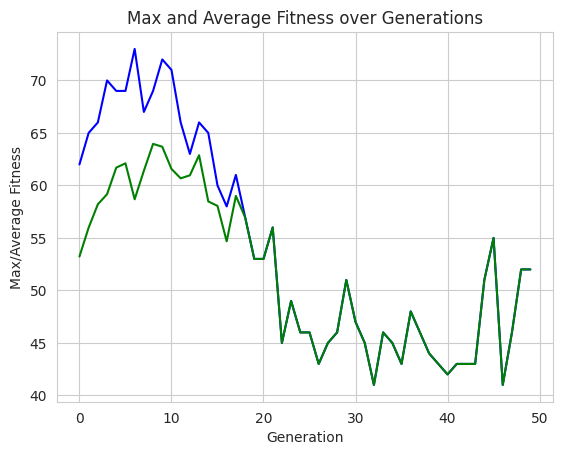

In [5]:
plot_values(max_fitness_values, mean_fitness_values)

El código comienza importando la biblioteca random y algunas herramientas de la biblioteca deap. Se establecen algunas variables importantes como el tamaño de la cadena `ONE_MAX_LENGTH`, el tamaño de la población `POPULATION_SIZE`, las tasas de cruce `P_CROSSOVER` y mutación `P_MUTATION` y el número máximo de generaciones `MAX_GENERATION`. También se establece una semilla para el generador de números aleatorios `RANDOM_SEED` para que los resultados sean reproducibles.

In [6]:
import random

from deap import base, creator, tools


ONE_MAX_LENGTH = 100
POPULATION_SIZE = 200
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATION = 50

RANDOM_SEED = 42

random.seed(RANDOM_SEED)

Luego se define una caja de herramientas (toolbox) utilizando la clase `base.Toolbox()` de la biblioteca deap. Se registra una función para crear individuos con valores aleatorios de ceros y unos. Se utiliza la clase creator para crear una clase de individuo que tiene una lista de valores y un atributo de "fitness" con un peso de 1.0.

In [7]:
toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

Se registra una función para crear una población de individuos utilizando la función anterior. Luego se define una función de evaluación `oneMaxFitness` que devuelve el número de unos en un individuo. También se registran funciones para selección `selTournament`, cruce `cxOnePoint` y mutación `mutFlipBit`.

In [8]:
toolbox.register(
    "individualCreator",
    tools.initRepeat,
    creator.Individual,
    toolbox.zeroOrOne,
    ONE_MAX_LENGTH,
)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


def oneMaxFitness(individual):
    return (sum(individual),)


toolbox.register("evaluate", oneMaxFitness)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)

toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / ONE_MAX_LENGTH)

Luego se crea una población inicial de individuos y se evalúa su fitness.

In [9]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
generation_counter = 0

fitness_values = list(map(toolbox.evaluate, population))
for individual, fitness_values in zip(population, fitness_values):
    individual.fitness.values = fitness_values

fitness_values = [individual.fitness.values[0] for individual in population]

max_fitness_values, mean_fitness_values = [], []
generations = {
    "Max Fitness": max_fitness_values, 
    "Avg. Fitness": mean_fitness_values, 
    "Best Individual": []
}

El código utiliza un bucle while para iterar a través de las generaciones hasta que se alcance el número máximo de generaciones o se encuentre un individuo con un valor de fitness de `ONE_MAX_LENGTH`. En cada iteración del bucle, se registran los valores máximos y promedios de fitness, así como el mejor individuo encontrado en esa generación. Al final del bucle, se imprimen los valores de fitness del mejor individuo y se muestran los números binarios de ese individuo.

In [10]:
while max(fitness_values) < ONE_MAX_LENGTH and generation_counter < MAX_GENERATION:
    generation_counter += 1
    offspring = toolbox.select(population, len(population))
    for c1, c2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            toolbox.mate(c1, c2)
            del c1.fitness.values
            del c2.fitness.values

    for individual in offspring:
        if random.random() < P_MUTATION:
            toolbox.mutate(individual)
            del individual.fitness.values

    fresh_individuals = [
        individual for individual in offspring if not individual.fitness.valid
    ]
    fresh_fitness_values = list(map(toolbox.evaluate, fresh_individuals))
    for individual, fitness_value in zip(fresh_individuals, fresh_fitness_values):
        individual.fitness.values = fitness_value

    population[:] = offspring
    fitness_values = [individual.fitness.values[0] for individual in population]

    max_fitness = max(fitness_values)
    mean_fitness = sum(fitness_values) / len(population)
    max_fitness_values.append(max_fitness)
    mean_fitness_values.append(mean_fitness)

    best_index = fitness_values.index(max(fitness_values))
    generations["Best Individual"].append(population[best_index])

# _One Max Problem with DEAP Built-in_

In [11]:
import random

import numpy as np

from deap import base, creator, tools, algorithms


ONE_MAX_LENGTH = 100
POPULATION_SIZE = 200
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATION = 50

RANDOM_SEED = 42

random.seed(RANDOM_SEED)

toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register(
    "individualCreator",
    tools.initRepeat,
    creator.Individual,
    toolbox.zeroOrOne,
    ONE_MAX_LENGTH,
)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def oneMaxFitness(individual):
    return (sum(individual),)


toolbox.register("evaluate", oneMaxFitness)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)

toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / ONE_MAX_LENGTH)

population = toolbox.populationCreator(n=POPULATION_SIZE)

stats = tools.Statistics(lambda individual: individual.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATION,
    stats=stats,
    verbose=True,
)

max_fitness_values, mean_fitness_values = logbook.select("max", "avg")


gen	nevals	max	avg   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

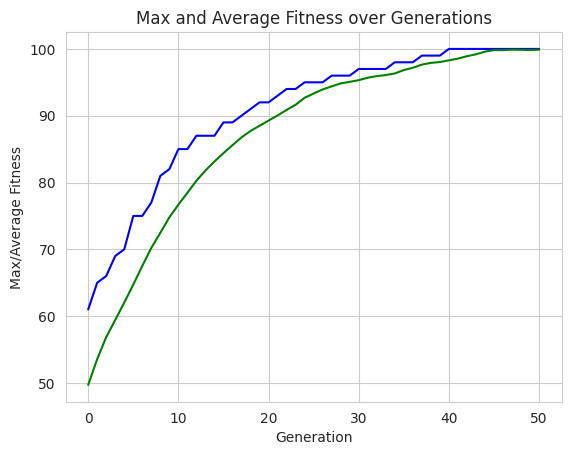

In [12]:
plot_values(max_fitness_values, mean_fitness_values)

# _OMP: Hall of Fame_

Este script utiliza algoritmos genéticos para resolver el problema de "One Max". El objetivo del problema es encontrar un individuo (una lista de números binarios) con la mayor cantidad de unos en una longitud específica.

In [13]:
import random

import numpy as np

from deap import base, creator, tools, algorithms


ONE_MAX_LENGTH = 100
POPULATION_SIZE = 200
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATION = 50
HALL_OF_FAME_SIZE = 10

RANDOM_SEED = 42

random.seed(RANDOM_SEED)

toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register(
    "individualCreator",
    tools.initRepeat,
    creator.Individual,
    toolbox.zeroOrOne,
    ONE_MAX_LENGTH,
)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def oneMaxFitness(individual):
    return (sum(individual),)


toolbox.register("evaluate", oneMaxFitness)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)

toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / ONE_MAX_LENGTH)

population = toolbox.populationCreator(n=POPULATION_SIZE)

stats = tools.Statistics(lambda individual: individual.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

population, logbook = algorithms.eaSimple(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATION,
    stats=stats,
    halloffame=hof,
    verbose=True,
)

print("Hall of Fame Individuals =", *hof.items, sep="\n")
print("Best Ever Individual =", hof.items[0])

max_fitness_values, mean_fitness_values = logbook.select("max", "avg")


gen	nevals	max	avg   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

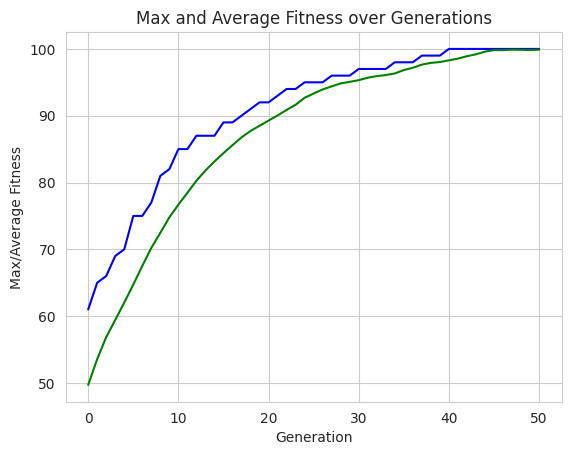

In [14]:
plot_values(max_fitness_values, mean_fitness_values)

El script comienza importando las librerías necesarias: `random`, `numpy` y `deap`. Luego se establecen algunos parámetros para el problema, como la longitud del individuo `ONE_MAX_LENGTH`, el tamaño de la población `POPULATION_SIZE`, las tasas de cruce y mutación `P_CROSSOVER` y `P_MUTATION`, el número máximo de generaciones `MAX_GENERATION` y la semilla de números aleatorios `RANDOM_SEED`.

In [15]:
import random

import numpy as np

from deap import base, creator, tools, algorithms


ONE_MAX_LENGTH = 100
POPULATION_SIZE = 200
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATION = 50
HALL_OF_FAME_SIZE = 10

RANDOM_SEED = 42

Se crea un objeto "toolbox" de la clase base de DEAP, el cual se utilizará para registrar las funciones necesarias para el algoritmo genético. Se registra una función "zeroOrOne" que genera números aleatorios binarios (0 o 1) y se utiliza para inicializar los individuos. Luego se crean dos tipos de objetos utilizando la clase "creator": "FitnessMax" y "Individual". El primero es utilizado para establecer el tipo de fitness (en este caso, se maximiza la suma de unos en el individuo) y el segundo se utiliza para crear los individuos.

In [16]:
toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

A continuación, se registran dos funciones en el toolbox: "individualCreator" y "populationCreator". La primera se utiliza para crear un individuo utilizando la función "zeroOrOne" y la longitud establecida, mientras que la segunda se utiliza para crear la población inicial. También se registra una función "evaluate" que se utiliza para calcular el fitness de los individuos (en este caso, simplemente se suma la cantidad de unos en el individuo).

In [17]:
toolbox.register(
    "individualCreator",
    tools.initRepeat,
    creator.Individual,
    toolbox.zeroOrOne,
    ONE_MAX_LENGTH,
)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def oneMaxFitness(individual):
    return (sum(individual),)


toolbox.register("evaluate", oneMaxFitness)

Luego se registran las funciones de selección, cruce y mutación. En este script se utiliza "selTournament" para la selección, "cxOnePoint" para el cruce y "mutFlipBit" para la mutación. También se establece el parámetro "indpb" en "mutFlipBit", lo que significa que cada bit en el individuo tiene una probabilidad del 1/ONE_MAX_LENGTH de ser mutado.

In [18]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)

toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / ONE_MAX_LENGTH)

Se crea la población inicial, se inicializan los valores de fitness para cada individuo y se utiliza la función "eaSimple" que devuelve dos valores, la población final y un registro (logbook) que contiene información sobre el rendimiento del algoritmo a lo largo de las generaciones. En este caso, se seleccionan los valores máximos y promedios de la aptitud de los individuos de cada generación y se asignan a las variables "max_fitness_values" y "mean_fitness_values", respectivamente. Estos valores se pueden utilizar para analizar el rendimiento del algoritmo y ver cómo cambia la aptitud de la población a medida que avanza el proceso de evolución.

In [19]:
population = toolbox.populationCreator(n=POPULATION_SIZE)

stats = tools.Statistics(lambda individual: individual.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATION,
    stats=stats,
    verbose=True,
)

max_fitness_values, mean_fitness_values = logbook.select("max", "avg")

gen	nevals	max	avg   
0  	200   	64 	50.185
1  	176   	67 	54.91 
2  	185   	68 	58.465
3  	184   	69 	61.03 
4  	192   	73 	63.94 
5  	189   	76 	66.61 
6  	183   	77 	68.72 
7  	182   	79 	70.875
8  	178   	79 	73.285
9  	176   	85 	75.295
10 	170   	83 	77.15 
11 	194   	85 	78.855
12 	183   	86 	80.74 
13 	186   	87 	82.38 
14 	174   	88 	84.025
15 	190   	89 	85.195
16 	176   	89 	86.08 
17 	175   	90 	87.025
18 	190   	91 	87.95 
19 	190   	92 	89.03 
20 	184   	93 	89.9  
21 	184   	93 	90.665
22 	189   	94 	91.645
23 	180   	95 	92.31 
24 	185   	96 	92.835
25 	189   	97 	93.385
26 	186   	97 	94.16 
27 	180   	97 	95.05 
28 	189   	98 	95.845
29 	181   	98 	96.45 
30 	185   	98 	96.865
31 	177   	98 	96.98 
32 	185   	99 	97.085
33 	177   	99 	97.335
34 	188   	100	97.77 
35 	181   	100	98.27 
36 	182   	100	98.77 
37 	180   	100	99.245
38 	186   	100	99.66 
39 	175   	100	99.915
40 	184   	100	99.93 
41 	185   	100	99.935
42 	180   	100	99.925
43 	178   	100	99.865
44 	181   

# _Perform a fine tuning analysis trying to optimize the performance of your algorithm. Report the best-found values of the parameters and explain how your fine-tuned algorithm outperforms the basic non-tuned version._

Para este apartado se evalúan los siguientes parámetros:

* Tamaño de la población `POPULATION_SIZE`
* Función de cross over
* Probabilidad de mutación `P_MUTATION`
* Probabilidad independiente de que cada atributo cambie `indpb`
* Tamaño del torneo `tournsize`

Para evaluar estas variables desarrollamos la función `evaluate` donde podemos pasar como parámetros esas mismas variables.

In [20]:
import random

import numpy as np

from deap import base, creator, tools, algorithms


ONE_MAX_LENGTH = 100
P_CROSSOVER = 0.9
MAX_GENERATION = 50
HALL_OF_FAME_SIZE = 10

RANDOM_SEED = 42

random.seed(RANDOM_SEED)

toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register(
    "individualCreator",
    tools.initRepeat,
    creator.Individual,
    toolbox.zeroOrOne,
    ONE_MAX_LENGTH,
)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def oneMaxFitness(individual):
    return (sum(individual),)

toolbox.register("evaluate", oneMaxFitness)


def evaluate(toolbox, population_size, crossover_func, p_mutation, indpb, tournsize):
    toolbox.register("select", tools.selTournament, tournsize=tournsize)
    toolbox.register("mate", crossover_func)

    toolbox.register("mutate", tools.mutFlipBit, indpb=indpb/ONE_MAX_LENGTH)

    population = toolbox.populationCreator(n=population_size)

    stats = tools.Statistics(lambda individual: individual.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    population, logbook = algorithms.eaSimple(
        population,
        toolbox,
        cxpb=P_CROSSOVER,
        mutpb=p_mutation,
        ngen=MAX_GENERATION,
        stats=stats,
        halloffame=hof,
    )
    return logbook.select("max", "avg")

Después de varias ejecuciones y combinaciones los mejores resultados fueron:

* `population_size = 1000`
* `crossover_function = tools.cxTwoPoint`
* `indpb = 1.0`
* `tournament_size` elevado

gen	nevals	max	avg   
0  	1000  	65 	49.938
1  	945   	73 	60.797
2  	948   	77 	67.542
3  	955   	84 	73.744
4  	958   	88 	79.07 
5  	935   	90 	84.915
6  	956   	93 	88.525
7  	955   	95 	91.233
8  	936   	97 	93.651
9  	956   	99 	95.474
10 	939   	100	97.217
11 	946   	100	98.663
12 	949   	100	99.5  
13 	957   	100	99.435
14 	965   	100	99.506
15 	940   	100	99.534
16 	953   	100	99.5  
17 	959   	100	99.526
18 	951   	100	99.498
19 	930   	100	99.544
20 	953   	100	99.503
21 	948   	100	99.449
22 	956   	100	99.54 
23 	936   	100	99.507
24 	940   	100	99.502
25 	955   	100	99.508
26 	949   	100	99.507
27 	946   	100	99.45 
28 	971   	100	99.493
29 	928   	100	99.523
30 	958   	100	99.534
31 	952   	100	99.521
32 	949   	100	99.452
33 	958   	100	99.463
34 	949   	100	99.542
35 	941   	100	99.47 
36 	942   	100	99.487
37 	951   	100	99.489
38 	953   	100	99.479
39 	949   	100	99.445
40 	951   	100	99.482
41 	949   	100	99.526
42 	950   	100	99.534
43 	913   	100	99.536
44 	965   

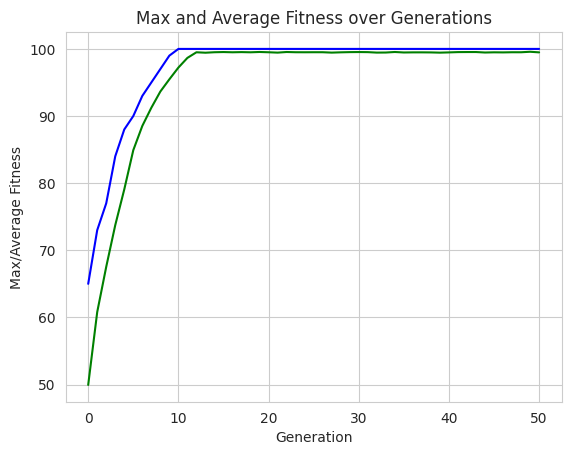

gen	nevals	max	avg   
0  	1000  	66 	49.845
1  	951   	72 	61.604
2  	954   	79 	69.74 
3  	960   	82 	76.243
4  	958   	87 	80.285
5  	957   	89 	84.713
6  	942   	91 	87.969
7  	945   	94 	90.487
8  	935   	96 	92.585
9  	961   	98 	94.878
10 	941   	99 	96.833
11 	957   	100	98.376
12 	956   	100	99.439
13 	954   	100	99.493
14 	955   	100	99.492
15 	957   	100	99.461
16 	958   	100	99.515
17 	953   	100	99.5  
18 	958   	100	99.509
19 	950   	100	99.494
20 	929   	100	99.509
21 	948   	100	99.463
22 	958   	100	99.499
23 	954   	100	99.532
24 	927   	100	99.498
25 	953   	100	99.531
26 	940   	100	99.478
27 	944   	100	99.496
28 	958   	100	99.529
29 	945   	100	99.466
30 	951   	100	99.514
31 	941   	100	99.476
32 	962   	100	99.532
33 	939   	100	99.507
34 	945   	100	99.492
35 	949   	100	99.471
36 	951   	100	99.549
37 	941   	100	99.52 
38 	957   	100	99.522
39 	942   	100	99.474
40 	948   	100	99.477
41 	944   	100	99.438
42 	945   	100	99.519
43 	955   	100	99.509
44 	934   

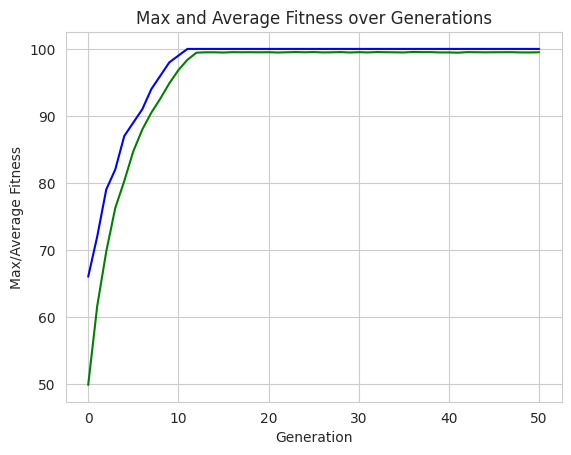

gen	nevals	max	avg   
0  	1000  	67 	50.175
1  	988   	71 	60.617
2  	994   	76 	67.427
3  	988   	81 	73.209
4  	988   	88 	78.306
5  	988   	90 	82.76 
6  	995   	91 	86.724
7  	993   	93 	89.286
8  	995   	95 	91.253
9  	991   	97 	93.021
10 	995   	98 	94.724
11 	988   	100	96.575
12 	990   	100	98.198
13 	986   	100	99.114
14 	989   	100	99.072
15 	989   	100	99.084
16 	986   	100	99.106
17 	989   	100	99.1  
18 	981   	100	99.088
19 	997   	100	99.1  
20 	990   	100	99.126
21 	982   	100	99.127
22 	987   	100	99.061
23 	987   	100	99.13 
24 	992   	100	99.133
25 	987   	100	99.162
26 	988   	100	99.167
27 	994   	100	99.098
28 	992   	100	99.177
29 	993   	100	99.075
30 	993   	100	99.096
31 	990   	100	99.122
32 	991   	100	99.12 
33 	992   	100	99.074
34 	996   	100	99.125
35 	988   	100	99.141
36 	991   	100	99.126
37 	995   	100	99.067
38 	993   	100	99.08 
39 	991   	100	99.075
40 	993   	100	99.118
41 	987   	100	99.093
42 	994   	100	99.119
43 	993   	100	99.1  
44 	990   

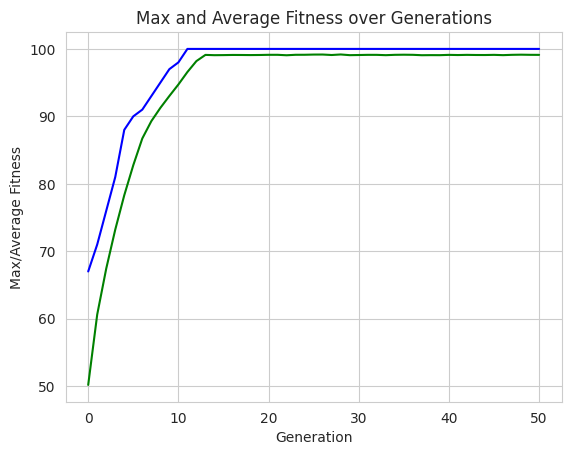

gen	nevals	max	avg   
0  	1000  	65 	50.237
1  	991   	73 	62.046
2  	993   	78 	69.448
3  	991   	82 	75.736
4  	991   	88 	80.009
5  	990   	90 	84.439
6  	988   	92 	88.462
7  	987   	94 	90.715
8  	991   	97 	92.734
9  	986   	98 	94.869
10 	991   	99 	96.786
11 	995   	100	98.02 
12 	993   	100	99.117
13 	987   	100	99.098
14 	987   	100	99.121
15 	993   	100	99.097
16 	992   	100	99.075
17 	989   	100	99.092
18 	986   	100	99.13 
19 	996   	100	99.1  
20 	995   	100	99.141
21 	989   	100	99.068
22 	989   	100	99.151
23 	982   	100	99.074
24 	993   	100	99.113
25 	990   	100	99.105
26 	984   	100	99.056
27 	987   	100	99.093
28 	994   	100	99.123
29 	990   	100	99.108
30 	990   	100	99.096
31 	991   	100	99.025
32 	991   	100	99.085
33 	990   	100	99.068
34 	988   	100	99.125
35 	991   	100	99.05 
36 	988   	100	99.115
37 	983   	100	99.116
38 	994   	100	99.116
39 	993   	100	99.096
40 	990   	100	99.089
41 	989   	100	99.062
42 	994   	100	99.086
43 	995   	100	99.069
44 	990   

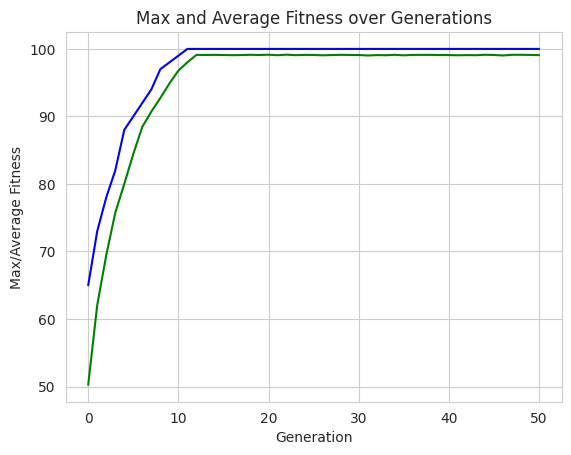

In [21]:
population_size = 1000
crossover_function = tools.cxTwoPoint
mutation_prob = [0.5, 0.9]
indpb = 1.0
tournament_size = [50, 100]

for mutation in mutation_prob:
    for ts in tournament_size:
        max_fitness_values, mean_fitness_values = evaluate(
            toolbox, 
            population_size, 
            crossover_function, 
            mutation, 
            indpb, 
            ts
        )
        plot_values(max_fitness_values, mean_fitness_values)

# _Knapsack Problem_

Dado un conjunto de artículos, cada uno con un peso y un valor, determine el número de cada artículo que se incluirá en una colección para que el peso total sea menor o igual a un límite dado y el valor total sea lo más grande posible. El problema a menudo surge en la asignación de recursos, donde los tomadores de decisiones tienen que elegir entre un conjunto de proyectos o tareas no divisibles bajo un presupuesto fijo o una restricción de tiempo, respectivamente.

###  _Knapsack Rosetta_

En Knapsack Rosetta desarrollamos la clase Knapsack que consiste en un listado de objetos que consiste en el nombre del objeto, su peso y su valor relativos a nuestro problema. La clase, a su vez contiene los métodos auxiliares `print_items(zero_one_list)` que dada una lista de valores (1 y 0) los mapea al de la lista interna siendo 1 un valor de objeto seleccionado y 0 no. Se iteran sobre todos los objetos seleccionados de la mochila mediante esta lista y se suman sus valores totales de peso y valor para mostrarse en pantalla.

In [22]:
import numpy as np


class Knapsack:
    def __init__(self, max_capacity=400):
        self.max_capacity = max_capacity
        self.items = [
            ("map", 9, 150),
            ("compass", 13, 35),
            ("sandwich", 153, 200),
            ("glucose", 50, 160),
            ("tin", 15, 60),
            ("banana", 68, 45),
            ("apple", 39, 40),
            ("cheese", 23, 30),
            ("beer", 52, 10),
            ("suntan", 11, 70),
            ("camera", 32, 30),
            ("t-shirt", 24, 15),
            ("trousers", 48, 10),
            ("umbrella", 73, 40),
            ("waterproof clothes", 42, 75),
            ("sunglasses", 7, 20),
            ("socks", 18, 12),
            ("towel", 4, 50),
            ("book", 30, 10),
        ]

    def __len__(self):
        return len(self.items)

    
    def get_value(self, zero_one_list):
        total_weight = total_value = 0
        for i in range(len(zero_one_list)):
            item, weight, value = self.items[i]
            if total_weight + weight <= self.max_capacity:
                total_weight += zero_one_list[i] * weight
                total_value += zero_one_list[i] * value
        return total_value

    
    def print_items(self, zero_one_list):
        total_weight = total_value = 0
        for i in range(len(zero_one_list)):
            item, weight, value = self.items[i]
            if zero_one_list[i] > 0:
                total_weight += weight
                total_value += value
                print(f"- Adding {item}: weight = {weight}, value = {value}, accumulated weight = {total_weight}, accumulated value = {total_value}")
        print(f"Total weight = {total_weight}, Total value = {total_value}")


knapsack = Knapsack()
random_solution = np.random.randint(2, size=len(knapsack))
print(f"Random solution = {random_solution}")
knapsack.print_items(random_solution)

Random solution = [1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0]
- Adding map: weight = 9, value = 150, accumulated weight = 9, accumulated value = 150
- Adding sandwich: weight = 153, value = 200, accumulated weight = 162, accumulated value = 350
- Adding tin: weight = 15, value = 60, accumulated weight = 177, accumulated value = 410
- Adding banana: weight = 68, value = 45, accumulated weight = 245, accumulated value = 455
- Adding apple: weight = 39, value = 40, accumulated weight = 284, accumulated value = 495
- Adding beer: weight = 52, value = 10, accumulated weight = 336, accumulated value = 505
- Adding suntan: weight = 11, value = 70, accumulated weight = 347, accumulated value = 575
- Adding camera: weight = 32, value = 30, accumulated weight = 379, accumulated value = 605
- Adding t-shirt: weight = 24, value = 15, accumulated weight = 403, accumulated value = 620
- Adding socks: weight = 18, value = 12, accumulated weight = 421, accumulated value = 632
- Adding towel: weight = 4, v

El método `get_value(zero_one_list)` es el más importante puesto que es el que se encarga de resolver el problema:

In [23]:
def get_value(self, zero_one_list):
    total_weight = total_value = 0
    for i in range(len(zero_one_list)):
        item, weight, value = self.items[i]
        if total_weight + weight <= self.max_capacity:
            total_weight += zero_one_list[i] * weight
            total_value += zero_one_list[i] * value
    return total_value

El método itera sobre los elementos de la lista de objetos (1 y 0): Si es 1 cogerá el elemento de la lista interna, no lo cogerá en caso contrario. Una vez seleccionado el objeto, si la suma de este al peso actual de la mochila  sobrepasa la capacidad máxima de la misma, la suma total y el valor total de la mochila se actualizarán

### GA Knapsack

En este apartado vemos una solución del problema de la mochila mediante algoritmos genéticos.

In [24]:
import random

import numpy

from deap import base, creator, tools, algorithms


knapsack = Knapsack()

population_size = 50
crossover = 0.9
mutation = 0.1
max_generations = 50
hall_of_fame_size = 1

seed = 42
random.seed(seed)

toolbox = base.Toolbox()
toolbox.register("zero_or_one", random.randint, 0, 1)
creator.create("fitness_max", base.Fitness, weights=(1.0,))
creator.create("individual", list, fitness=creator.fitness_max)
toolbox.register(
    "individual_creator",
    tools.initRepeat,
    creator.individual,
    toolbox.zero_or_one,
    len(knapsack),
)
toolbox.register(
    "population_creator", tools.initRepeat, list, toolbox.individual_creator
)


def knapsack_value(individual):
    return (knapsack.get_value(individual),)


toolbox.register("evaluate", knapsack_value)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / len(knapsack))

population = toolbox.population_creator(n=population_size)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

hof = tools.HallOfFame(hall_of_fame_size)

population, logbook = algorithms.eaSimple(
    population,
    toolbox,
    cxpb=crossover,
    mutpb=mutation,
    ngen=max_generations,
    stats=stats,
    halloffame=hof,
    verbose=True,
)
best = hof.items[0]
print(f"-- Best Ever Individual = {best}")
print(f"-- Best Ever Fitness = {best.fitness.values[0]}")
print(f"-- Knapsack Items =")
knapsack.print_items(best)

max_fitness_values, mean_fitness_values = logbook.select("max", "avg")

gen	nevals	max	avg  
0  	50    	785	531.1
1  	46    	882	651.02
2  	46    	882	729.56
3  	45    	905	798.04
4  	50    	905	819.66
5  	44    	905	845.38
6  	45    	905	865.54
7  	42    	905	869.7 
8  	46    	905	885.08
9  	44    	905	904.7 
10 	44    	905	896.6 
11 	45    	905	902.44
12 	50    	905	898.1 
13 	48    	905	900.74
14 	47    	905	897.94
15 	45    	905	898.1 
16 	45    	905	900.6 
17 	46    	905	901.1 
18 	46    	905	902.64
19 	46    	905	898.04
20 	42    	905	899.8 
21 	43    	905	902.4 
22 	42    	905	897.8 
23 	46    	905	899.2 
24 	43    	905	903.7 
25 	48    	905	898.04
26 	47    	905	898.7 
27 	43    	905	902.54
28 	43    	905	900.38
29 	48    	905	895.8 
30 	46    	905	892.58
31 	44    	905	904.64
32 	48    	905	901.24
33 	49    	905	903.1 
34 	48    	905	902.1 
35 	44    	905	899.8 
36 	45    	905	896.64
37 	46    	905	901.2 
38 	41    	905	899.3 
39 	44    	905	895.3 
40 	42    	905	897.5 
41 	40    	905	900.3 
42 	46    	905	904   
43 	49    	905	893.42
44 	46    	9

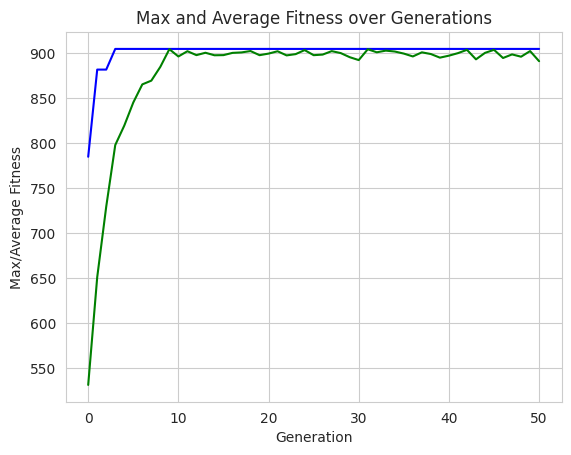

In [25]:
plot_values(max_fitness_values, mean_fitness_values)

El código comienza importando las bibliotecas necesarias, incluidas random y numpy para generar números aleatorios, y DEAP para implementar el algoritmo genético.

Lo primero que hace el código es crear una instancia de la clase Knapsack, definida anteriormente

In [26]:
import random

import numpy

from deap import base, creator, tools, algorithms


knapsack = Knapsack()

A continuación, el código establece algunos parámetros para el algoritmo genético, como el tamaño de la población, la tasa de cruce, la tasa de mutación y el número de generaciones. La semilla se establece en 42, por lo que la generación de números aleatorios será reproducible.

In [27]:
population_size = 50
crossover = 0.9
mutation = 0.1
max_generations = 50
hall_of_fame_size = 1

seed = 42
random.seed(seed)

La caja de herramientas DEAP se utiliza luego para registrar diferentes funciones que se utilizarán en el algoritmo genético:

* "zero_or_one" que genera un 0 o 1 aleatorio
* "fitness_max" que define la función de fitness, que en este caso es un valor único que representa el valor total de los artículos en la mochila
* "individual" que define la solución individual, que en este caso es una lista de 0 y 1 que representan los artículos en la mochila 
* "individual_creator" que crea un individuo repitiendo la función  "zero_or_one" para el número de artículos en la mochila 
* "population_creator" que crea una población de individuos 
* "kanpsack_valor" que calcula el valor total de la mochila para un individuo dado 
* "evaluate" que asigna el valor de aptitud a un individuo utilizando la función "mochila_valor" 
* "select" que selecciona individuos para la próxima generación mediante la selección de torneos 
* "mate" que realiza el cruce utilizando el método de dos puntos (`cxTwoPoint`)
* "mutate" que realiza la mutación volteando un bit aleatorio

In [28]:
toolbox = base.Toolbox()
toolbox.register("zero_or_one", random.randint, 0, 1)
creator.create("fitness_max", base.Fitness, weights=(1.0,))
creator.create("individual", list, fitness=creator.fitness_max)
toolbox.register(
    "individual_creator",
    tools.initRepeat,
    creator.individual,
    toolbox.zero_or_one,
    len(knapsack),
)
toolbox.register(
    "population_creator", tools.initRepeat, list, toolbox.individual_creator
)


def knapsack_value(individual):
    return (knapsack.get_value(individual),)


toolbox.register("evaluate", knapsack_value)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / len(knapsack))

Luego, el código crea una población inicial utilizando la función "population_creator" y registra algunas estadísticas que se recopilarán durante el proceso de evolución, incluidos los valores de aptitud máximo y promedio. El código también instancia un `HallOfFame` para realizar un seguimiento de la mejor persona encontrada hasta el momento.

In [29]:
population = toolbox.population_creator(n=population_size)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

hof = tools.HallOfFame(hall_of_fame_size)

A continuación, se utiliza la función eaSimple del módulo de algoritmos DEAP para realizar el proceso de evolución. Esta función toma la población inicial, la caja de herramientas de funciones y los parámetros de cruce, mutación y número de generaciones, y devuelve la población final y un libro de registro que contiene las estadísticas recopiladas durante el proceso de evolución.

In [30]:
population, logbook = algorithms.eaSimple(
    population,
    toolbox,
    cxpb=crossover,
    mutpb=mutation,
    ngen=max_generations,
    stats=stats,
    halloffame=hof,
    verbose=True,
)

gen	nevals	max	avg  
0  	50    	785	531.1
1  	46    	882	651.02
2  	46    	882	729.56
3  	45    	905	798.04
4  	50    	905	819.66
5  	44    	905	845.38
6  	45    	905	865.54
7  	42    	905	869.7 
8  	46    	905	885.08
9  	44    	905	904.7 
10 	44    	905	896.6 
11 	45    	905	902.44
12 	50    	905	898.1 
13 	48    	905	900.74
14 	47    	905	897.94
15 	45    	905	898.1 
16 	45    	905	900.6 
17 	46    	905	901.1 
18 	46    	905	902.64
19 	46    	905	898.04
20 	42    	905	899.8 
21 	43    	905	902.4 
22 	42    	905	897.8 
23 	46    	905	899.2 
24 	43    	905	903.7 
25 	48    	905	898.04
26 	47    	905	898.7 
27 	43    	905	902.54
28 	43    	905	900.38
29 	48    	905	895.8 
30 	46    	905	892.58
31 	44    	905	904.64
32 	48    	905	901.24
33 	49    	905	903.1 
34 	48    	905	902.1 
35 	44    	905	899.8 
36 	45    	905	896.64
37 	46    	905	901.2 
38 	41    	905	899.3 
39 	44    	905	895.3 
40 	42    	905	897.5 
41 	40    	905	900.3 
42 	46    	905	904   
43 	49    	905	893.42
44 	46    	9

Finalmente, el código imprime el mejor individuo encontrado, su valor de aptitud y los detalles de los artículos de mochila que contiene. También se trazan los valores de fitness máximo y medio del libro de registro.

# _Watch the YouTube video “Introduction to Genetic Algorithms - Practical Genetic Algorithms Series” and write a short report on the main concepts described._

El vídeo describe los algoritmos genéticos y sus principales características. Estos algoritmos intentan simular el proceso de evolución biológica para resolver una variedad de problemas, principalmente problemas de optimización. En En el vídeo se propone el uso de los algoritmos genéticos se utilizan para encontrar el valor mínimo de una función dada, buscando entre todas las soluciones posibles en un dominio dado. El proceso de evolución es similar a un problema de optimización, donde un problema se resuelve a lo largo del tiempo a través de la combinación de diferentes soluciones. Los algoritmos genéticos simulan este proceso utilizando estructuras similares al ADN llamadas cromosomas para representar las soluciones y aplicando operadores evolutivos para generar nuevas soluciones.

La estructura general de un algoritmo evolutivo es la siguiente: 
1. Se comienza con una población inicial generada al azar, que se evalúa para conocer el valor de la función objetivo. 
2. Se realiza la operación de cruce, que es una forma de reproducción, donde se seleccionan padres y se realiza un cruce para crear nuevas soluciones (llamadas descendencia). 
3. Se recolecta toda la descendencia como una población nueva, y se realiza una mutación en ella. Mientras tanto, también se puede mutar la población original para obtener soluciones diferentes. 
4. Se repite este proceso de selección, reproducción y mutación hasta que se cumplan algunas condiciones de término. 

El cruce es un operador que acepta información de dos padres. El operador combina la información de ambos padres para crear dos nuevas soluciones, llamadas descendencia. El cruce utiliza operadores matemáticos para combinar la información de los padres. Por ejemplo, si los cromosomas están en formato binario, se puede usar un operador de cruce de punto único, donde se selecciona un punto de corte al azar y se intercambian las partes a la derecha e izquierda de los cromosomas de los padres para obtener dos nuevos cromosomas. También se puede usar el operador de cruce de punto doble, donde se seleccionan dos puntos de corte y se intercambia la parte del medio para obtener dos nuevos cromosomas. Además, se puede modelar el cruce de forma numérica, multiplicando elemento por elemento los cromosomas de los padres para obtener la descendencia.

Los algoritmos genéticos tienen una estructura general que consta de una inicialización, un bucle de evolución y una condición de terminación. La inicialización implica la creación de soluciones aleatorias para el problema de optimización. Durante el bucle de evolución, se realiza una selección, reproducción y mutación de las soluciones. 

La mutación es un mecanismo que introduce errores aleatorios en las soluciones para aumentar la exploración del algoritmo y crear soluciones innovadoras. Los algoritmos genéticos también tienen una tasa de mutación que puede ser ajustada según el problema y el espacio de búsqueda. El proceso de selección de padres puede ser realizado de manera aleatoria o mediante torneos, donde se selecciona al individuo más apto de un grupo seleccionado de individuos.

# _Personal comments on the topics studied in these slides_

Los algoritmos genéticos atacan problemas clásicos de la computación de manera novedosa e interesante, es un claro ejemplo de biomimesis bien aplicado. Me ha gustado ver cómo un problema típico de algoritmia como el de la mochila se puede abordar de una forma tan diferente, creo que tiene muchas aplicaciones diversas a problemas planteados en esta asignatura y siempre es interesante ver nuevas soluciones.  
Sin embargo, la librería DEAP me resulta un tanto difícil de manejar y entender, aplicar los conceptos generales de selección, descendencia, mutaciones, etc. ya es algo extraño si nunca se ha visto pero además creo que la librería no permite entender muy bien qué está pasando.  
Finalmente, creo que los problemas planteados a resolver en estas diapositivas permiten entender bien cómo se resuelven problemas mediante este nuevo paradigma puesto que son sencillos pero su adaptación a los algoritmos genéticos puede ser un tanto difícil.

# _Provide a short feedback on the course and also assign yourself a score for your class participation /  Include the student's personal opinion about the course._

La clase de optimización metaheurística me ha parecido especialmente interesante.  
Me ha gustado que el temario esté contextualizado en soluciones aplicables a la vida real en problemas de hoy y del futuro. El contenido práctico se ajusta muy bien al teórico y además las explicaciones del profesor en formato vídeo y diapositiva hace que sea fácil de seguir y de entender.

Esta asignatura también me ha permitido desarrollar habilidades transversales a este máster, las prácticas permiten trabajar con conceptos y librerías que se usan en otras asignaturas y se repasan y cimentan problemas y conceptos importantes que ayudan al estudiante en otras disciplinas como Inteligencia Artificial o Simulación.

Otro aspecto que creo que es muy positivo de esta asignatura es que hace que el alumno tenga que leer artículos e investigar en estos temas de manera independiente. Es importante que un alumno de máster haga este tipo de actividades puesto que se supone que se tiene que convertir en un experto en la materia y estar al día en el estado del arte.

Personalmente, me hubiera gustado participar más activamente en esta asignatura pero me ha resultado difícil de compaginar por circunstancias personales. La puntuación que me asigno es de 8/10.